In [2]:
from astropy.io import fits
import numpy as np
import astropy
from astropy.table import Table
import matplotlib.pyplot as plt

In [3]:
path = '/home/suman/tifr/'
file = path + '202307011_1506_Am241_on_det1_30000pkts.fits'

hdul = fits.open(file)[1]

In [4]:
data = hdul.data
tab = Table(data)
tab

time,detid,pixid,pha
uint32,int16,int16,int16
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [5]:
data['pixid']

array([  0,   0,   0, ..., 165, 101, 154], dtype=int16)

In [6]:
#mask = 0 < np.any(data['pixid']) < 3

In [7]:
#plt.plot(data["pixid"][mask],data["pha"][mask])

In [10]:
detid = data[data['detid']== 1]

np.shape(detid)
detid


FITS_rec([( 3883520021, 1, 224, 339), ( 3883520048, 1, 252, 389),
          ( 3883520075, 1, 247, 371), ..., (  729061262, 1, 165, 373),
          (  729061679, 1, 101, 666), (  729062736, 1, 154, 985)],
         dtype=(numpy.record, [('time', '>i4'), ('detid', '>i2'), ('pixid', '>i2'), ('pha', '>i2')]))

In [12]:
tab = Table(data)
#tab

time,detid,pixid,pha
uint32,int16,int16,int16
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [13]:
tab_ = Table(detid)
tab_

time,detid,pixid,pha
uint32,int16,int16,int16
3883520021,1,224,339
3883520048,1,252,389
3883520075,1,247,371
3883520102,1,91,1032
3883520129,1,0,550
3883520156,1,253,426
...,...,...,...
729060084,1,181,599
729060133,1,0,346


In [15]:
len(np.unique(detid['time']))

2339639

In [295]:
import matplotlib.pyplot as plt

In [16]:
len(detid['pha'])

2339639

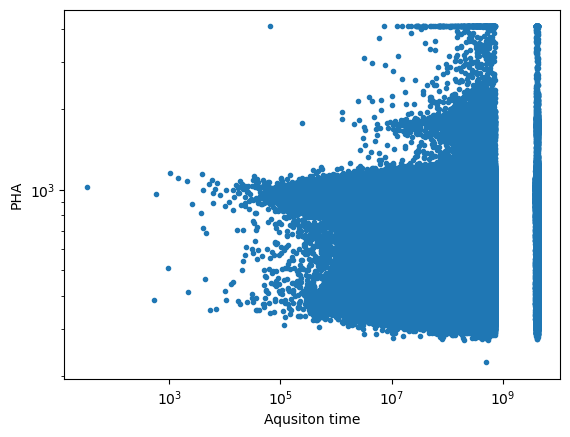

In [17]:
plt.plot((detid['time']),(detid['pha']),".")
plt.xlabel("Aqusiton time")
plt.ylabel("PHA")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 100000000)

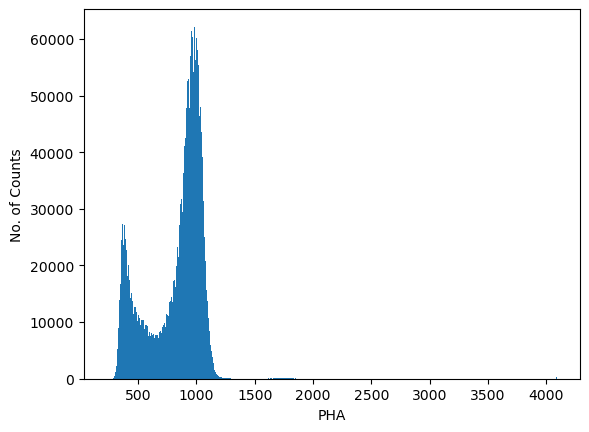

501

In [18]:
N,bins,_ = plt.hist(detid['pha'], bins=500)
plt.xlabel("PHA")
plt.ylabel("No. of Counts")
plt.show()
len(bins)

In [19]:
len(N)

500

In [20]:
bin_centers = (bins[:-1] + bins[1:]) / 2

In [21]:
def gauss(x,amp,mean,stdev):
    return amp*np.exp(-(x-mean)**2/(2*stdev**2))

In [22]:
gauss(1,10,9.3,0.3)

6.107321563648419e-166

In [24]:
p0 = [np.max(N),np.mean(detid['pha']),np.std(detid['pha'])]

In [25]:
p0

[62143.0, 819.4146357621838, 238.9967530528946]

In [26]:
from scipy.optimize import curve_fit

In [27]:
params, pcov = curve_fit(gauss,bin_centers,N,p0)
errors = np.sqrt(np.diag(pcov))

In [28]:
print("Fit results")
for p,e in zip(params, errors):
    print(f"{p:0.1f} +- {e:0.1f}")
print("Approximate resolution : {:0.1f}%".format(100* 2.35 * params[2] / params[1]))

Fit results
58291.3 +- 1303.3
962.6 +- 2.3
88.4 +- 2.3
Approximate resolution : 21.6%


In [29]:
fit_curve = gauss(bin_centers,*params)

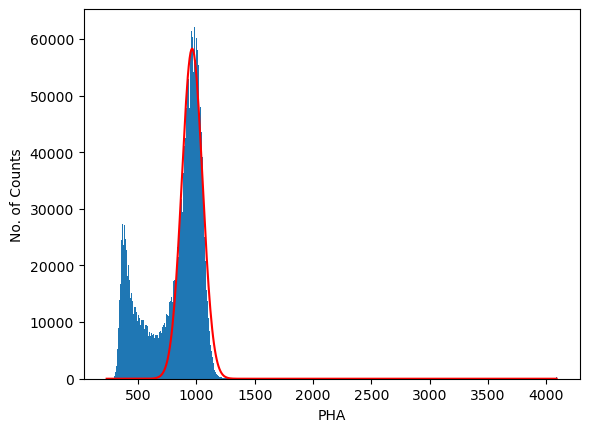

In [31]:
plt.plot(bin_centers, fit_curve, 'r-', label='Gaussian Fit')
N,bins,_ = plt.hist(detid['pha'], bins=len(bins)-1)
plt.xlabel("PHA")
plt.ylabel("No. of Counts")
plt.show()